In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers.legacy import Adam
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.utils import compute_sample_weight

/var/folders/r4/7pf11ys10v3_zn69hlpg60_h0000gn/T/ipykernel_28093/2795426452.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('./SalarayDataSet/ds_salaries.csv')

# Data Modification

In [3]:
cols_to_normalize = ['salary', 'salary_in_usd']
data[cols_to_normalize] = data[cols_to_normalize] / 100000

## Data Preprocessing and Splitting

In [4]:
data_X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

numeric_features = data_X.select_dtypes(include=[np.number])
numeric_transformer = StandardScaler()

categorical_features = data_X.select_dtypes(include=['object'])
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)
    ])
indices = data.index

train_indices, valid_indices = train_test_split(indices, test_size=0.4, random_state=42)
x_train, y_train = data_X.loc[train_indices, :], y.loc[train_indices]
x_valid, y_valid = data_X.loc[valid_indices, :], y.loc[valid_indices]

X_train_preprocessed = preprocessor.fit_transform(x_train)
X_valid_preprocessed = preprocessor.transform(x_valid)

## Early Stopping Configuration
We configure early stopping to monitor the validation loss and terminate training if the loss does not improve after a specified number of epochs.

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Models

## Linear Regression Modeling with and without Early Stopping

In this section, we implement linear regression models with early stopping to prevent overfitting and improve generalization performance. The following steps are executed:

1. **Building Linear Regression Model:** Two linear regression models are constructed using the Keras Sequential API. The first model (`linear_regression_early_stopping`) is equipped with early stopping, while the second model (`linear_regression`) is trained without early stopping.

2. **Model Training:** Both models are trained on the preprocessed training data (`X_train_preprocessed` and `y_train`) with the validation data (`X_valid_preprocessed` and `y_valid`) used for validation during training. The `callbacks` parameter is set to include early stopping for the first model.

3. **Evaluation:** After training, both models are evaluated on the validation set to assess their performance using mean squared error (MSE) and mean absolute error (MAE) metrics.

In [6]:
linear_regression_early_stopping = Sequential([
    Dense(1, input_shape=(X_train_preprocessed.shape[1],), activation='linear')
])

linear_regression_early_stopping.compile(optimizer=Adam(learning_rate=0.001),  
              loss='mean_squared_error', 
              metrics=['mae']) 

linear_history_early_stopping = linear_regression_early_stopping.fit(X_train_preprocessed, y_train,
                    validation_data=(X_valid_preprocessed, y_valid),
                    epochs=400,
                    batch_size=32,
                    verbose=2,
                    callbacks=[early_stopping])

linear_evaluation_result_early_stopping = linear_regression_early_stopping.evaluate(X_valid_preprocessed, y_valid, verbose=0)

Epoch 1/400
71/71 - 0s - loss: 1.8373 - mae: 1.1822 - val_loss: 1.3100 - val_mae: 0.9632 - 220ms/epoch - 3ms/step
Epoch 2/400
71/71 - 0s - loss: 0.9504 - mae: 0.7948 - val_loss: 0.7024 - val_mae: 0.6478 - 49ms/epoch - 685us/step
Epoch 3/400
71/71 - 0s - loss: 0.5381 - mae: 0.5628 - val_loss: 0.4436 - val_mae: 0.4855 - 47ms/epoch - 660us/step
Epoch 4/400
71/71 - 0s - loss: 0.3682 - mae: 0.4523 - val_loss: 0.3440 - val_mae: 0.4242 - 47ms/epoch - 660us/step
Epoch 5/400
71/71 - 0s - loss: 0.3024 - mae: 0.4100 - val_loss: 0.3050 - val_mae: 0.4029 - 128ms/epoch - 2ms/step
Epoch 6/400
71/71 - 0s - loss: 0.2746 - mae: 0.3920 - val_loss: 0.2886 - val_mae: 0.3951 - 99ms/epoch - 1ms/step
Epoch 7/400
71/71 - 0s - loss: 0.2601 - mae: 0.3834 - val_loss: 0.2788 - val_mae: 0.3899 - 48ms/epoch - 682us/step
Epoch 8/400
71/71 - 0s - loss: 0.2507 - mae: 0.3771 - val_loss: 0.2718 - val_mae: 0.3852 - 47ms/epoch - 661us/step
Epoch 9/400
71/71 - 0s - loss: 0.2438 - mae: 0.3716 - val_loss: 0.2665 - val_mae: 0.

In [7]:
linear_regression = Sequential([
    Dense(1, input_shape=(X_train_preprocessed.shape[1],), activation='linear')
])

linear_regression.compile(optimizer=Adam(learning_rate=0.001),  
              loss='mean_squared_error',  
              metrics=['mae']) 

linear_history = linear_regression.fit(X_train_preprocessed, y_train,
                    validation_data=(X_valid_preprocessed, y_valid),
                    epochs=400,
                    batch_size=32,
                    verbose=2)

linear_evaluation_result = linear_regression.evaluate(X_valid_preprocessed, y_valid, verbose=0)

Epoch 1/400
71/71 - 0s - loss: 2.6647 - mae: 1.4569 - val_loss: 1.9664 - val_mae: 1.2237 - 195ms/epoch - 3ms/step
Epoch 2/400
71/71 - 0s - loss: 1.4859 - mae: 1.0430 - val_loss: 1.0979 - val_mae: 0.8670 - 49ms/epoch - 689us/step
Epoch 3/400
71/71 - 0s - loss: 0.8418 - mae: 0.7456 - val_loss: 0.6505 - val_mae: 0.6227 - 46ms/epoch - 651us/step
Epoch 4/400
71/71 - 0s - loss: 0.5228 - mae: 0.5569 - val_loss: 0.4398 - val_mae: 0.4855 - 47ms/epoch - 659us/step
Epoch 5/400
71/71 - 0s - loss: 0.3768 - mae: 0.4612 - val_loss: 0.3487 - val_mae: 0.4273 - 46ms/epoch - 652us/step
Epoch 6/400
71/71 - 0s - loss: 0.3129 - mae: 0.4194 - val_loss: 0.3095 - val_mae: 0.4064 - 46ms/epoch - 651us/step
Epoch 7/400
71/71 - 0s - loss: 0.2832 - mae: 0.3998 - val_loss: 0.2909 - val_mae: 0.3977 - 46ms/epoch - 648us/step
Epoch 8/400
71/71 - 0s - loss: 0.2672 - mae: 0.3899 - val_loss: 0.2801 - val_mae: 0.3922 - 46ms/epoch - 647us/step
Epoch 9/400
71/71 - 0s - loss: 0.2572 - mae: 0.3836 - val_loss: 0.2729 - val_mae:

### Results

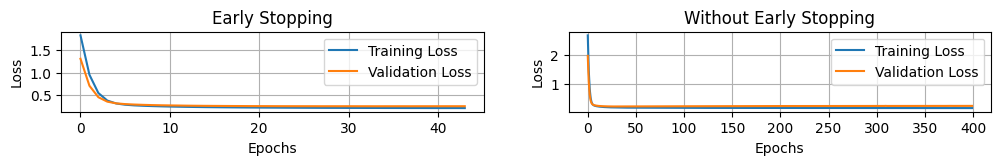

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot for linear_history_early_stopping
axs[0].plot(linear_history_early_stopping.history['loss'], label='Training Loss')
axs[0].plot(linear_history_early_stopping.history['val_loss'], label='Validation Loss')
axs[0].set_title('Early Stopping')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[0].legend()

# Plot for linear_history
axs[1].plot(linear_history.history['loss'], label='Training Loss')
axs[1].plot(linear_history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Without Early Stopping')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].legend()

plt.subplots_adjust(top=0.2, bottom=0.0)
plt.show()

## Multi-Layer Perceptron (MLP) Modeling with Early Stopping

This section outlines the process of building, training, and evaluating Multi-Layer Perceptron (MLP) models with early stopping applied to prevent overfitting. The following steps are involved:

1. **Model Architecture Definition:** Two MLP models are defined using the Keras Sequential API. Each model consists of multiple dense layers with rectified linear unit (ReLU) activation functions, batch normalization for improving convergence, and dropout layers for regularization.

2. **Model Compilation:** Both MLP models are compiled using the Adam optimizer, mean squared error (MSE) as the loss function, and mean absolute error (MAE) as the metric to monitor during training.

3. **Model Training:** The MLP models are trained on the preprocessed training data (`X_train_preprocessed` and `y_train`) with early stopping applied to one of the models. 

4. **Evaluation:** After training, the performance of both models is evaluated on the validation set to assess their predictive capabilities using MSE and MAE metrics.

In [9]:
mlp_model_early_stopping = Sequential([
    Dense(128, activation='relu', input_dim=X_train_preprocessed.shape[1]),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.3),  

    Dense(128, activation='relu'),
    Dropout(0.3),  

    Dense(1, activation='linear')
])

mlp_model_early_stopping.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])

mlp_history_early_stopping = mlp_model_early_stopping.fit(X_train_preprocessed, y_train,
                    validation_data=(X_valid_preprocessed, y_valid),
                    epochs=400,  
                    batch_size=32,  
                    verbose=2,
                    callbacks=[early_stopping])

mlp_evaluation_result_early_stopping = mlp_model_early_stopping.evaluate(X_valid_preprocessed, y_valid, verbose=0)

Epoch 1/400
71/71 - 0s - loss: 0.5970 - mae: 0.5809 - val_loss: 1.6372 - val_mae: 1.1332 - 380ms/epoch - 5ms/step
Epoch 2/400
71/71 - 0s - loss: 0.3333 - mae: 0.4448 - val_loss: 1.4241 - val_mae: 1.0460 - 99ms/epoch - 1ms/step
Epoch 3/400
71/71 - 0s - loss: 0.2733 - mae: 0.4081 - val_loss: 1.1241 - val_mae: 0.9205 - 100ms/epoch - 1ms/step
Epoch 4/400
71/71 - 0s - loss: 0.2350 - mae: 0.3670 - val_loss: 1.0229 - val_mae: 0.8841 - 188ms/epoch - 3ms/step
Epoch 5/400
71/71 - 0s - loss: 0.1738 - mae: 0.3188 - val_loss: 0.6188 - val_mae: 0.6764 - 116ms/epoch - 2ms/step
Epoch 6/400
71/71 - 0s - loss: 0.1442 - mae: 0.2934 - val_loss: 0.3314 - val_mae: 0.4766 - 116ms/epoch - 2ms/step
Epoch 7/400
71/71 - 0s - loss: 0.1197 - mae: 0.2675 - val_loss: 0.2517 - val_mae: 0.4221 - 101ms/epoch - 1ms/step
Epoch 8/400
71/71 - 0s - loss: 0.0987 - mae: 0.2443 - val_loss: 0.0744 - val_mae: 0.1933 - 102ms/epoch - 1ms/step
Epoch 9/400
71/71 - 0s - loss: 0.0944 - mae: 0.2381 - val_loss: 0.1011 - val_mae: 0.2664 

In [10]:
mlp_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_preprocessed.shape[1]),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.3),  

    Dense(128, activation='relu'),
    Dropout(0.3), 

    Dense(1, activation='linear')
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])


mlp_history = mlp_model.fit(X_train_preprocessed, y_train,
                    validation_data=(X_valid_preprocessed, y_valid),
                    epochs=400,  
                    batch_size=32, 
                    verbose=2)

mlp_evaluation_result = mlp_model.evaluate(X_valid_preprocessed, y_valid, verbose=0)

Epoch 1/400
71/71 - 0s - loss: 0.6052 - mae: 0.5911 - val_loss: 1.4944 - val_mae: 1.0683 - 377ms/epoch - 5ms/step
Epoch 2/400
71/71 - 0s - loss: 0.3276 - mae: 0.4428 - val_loss: 1.3065 - val_mae: 0.9930 - 104ms/epoch - 1ms/step
Epoch 3/400
71/71 - 0s - loss: 0.2845 - mae: 0.4055 - val_loss: 1.1321 - val_mae: 0.9147 - 107ms/epoch - 2ms/step
Epoch 4/400
71/71 - 0s - loss: 0.2267 - mae: 0.3626 - val_loss: 0.8194 - val_mae: 0.7666 - 110ms/epoch - 2ms/step
Epoch 5/400
71/71 - 0s - loss: 0.1881 - mae: 0.3343 - val_loss: 0.6560 - val_mae: 0.6895 - 108ms/epoch - 2ms/step
Epoch 6/400
71/71 - 0s - loss: 0.1423 - mae: 0.2865 - val_loss: 0.2408 - val_mae: 0.3778 - 111ms/epoch - 2ms/step
Epoch 7/400
71/71 - 0s - loss: 0.1151 - mae: 0.2617 - val_loss: 0.1935 - val_mae: 0.3432 - 110ms/epoch - 2ms/step
Epoch 8/400
71/71 - 0s - loss: 0.0977 - mae: 0.2389 - val_loss: 0.1075 - val_mae: 0.2329 - 108ms/epoch - 2ms/step
Epoch 9/400
71/71 - 0s - loss: 0.0957 - mae: 0.2347 - val_loss: 0.1457 - val_mae: 0.3080

### Results

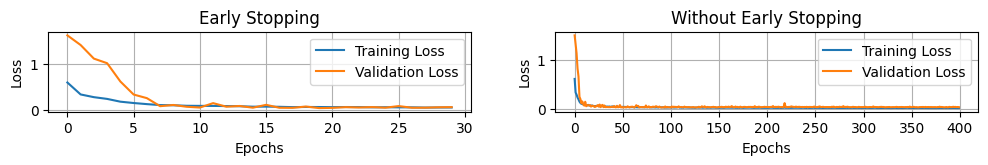

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot for mlp_history_early_stopping
axs[0].plot(mlp_history_early_stopping.history['loss'], label='Training Loss')
axs[0].plot(mlp_history_early_stopping.history['val_loss'], label='Validation Loss')
axs[0].set_title('Early Stopping')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[0].legend()

# Plot for mlp_history
axs[1].plot(mlp_history.history['loss'], label='Training Loss')
axs[1].plot(mlp_history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Without Early Stopping')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].legend()

plt.subplots_adjust(top=0.2, bottom=0.0)
plt.show()

## Multi-Layer Perceptron (MLP) Modeling with Sample Weights

This section describes the implementation of sample weights in Multi-Layer Perceptron (MLP) models to address class imbalance issues. The steps involved in incorporating sample weights into the MLP modeling process are outlined below:

1. **Computing Sample Weights:** Sample weights are computed using the `compute_sample_weight` function from scikit-learn, with the 'balanced' strategy applied to ensure balanced class weights.

    ```python
    sample_weights_train = compute_sample_weight('balanced', y_train)
    ```

2. **Model Architecture Definition:** Two MLP models are defined using the Keras Sequential API. Each model comprises multiple dense layers with ReLU activation functions, batch normalization, and dropout layers for regularization.


3. **Model Compilation:** Both MLP models are compiled using the Adam optimizer, mean squared error (MSE) as the loss function, mean absolute error (MAE) as the metric, and 'temporal' sample weight mode to incorporate sample weights during training.

4. **Model Training:** The MLP models are trained on the preprocessed training data (`X_train_preprocessed` and `y_train`) with early stopping applied to one of the models. Sample weights are passed as an argument to the `fit` method to incorporate them during training.

5. **Evaluation:** After training, the performance of both models is evaluated on the validation set to assess their predictive capabilities using MSE and MAE metrics.

In [12]:
sample_weights_train = compute_sample_weight('balanced', y_train)
mlp_weight_model_early_stopping = Sequential([
    Dense(128, activation='relu', input_dim=X_train_preprocessed.shape[1]),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.3), 

    Dense(128, activation='relu'),
    Dropout(0.3),  

    Dense(1, activation='linear')
])

mlp_weight_model_early_stopping.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error', 
              metrics=['mae'],
              sample_weight_mode='temporal') 

weight_model_history_early_stopping = mlp_weight_model_early_stopping.fit(X_train_preprocessed, y_train,
                    validation_data=(X_valid_preprocessed, y_valid),
                    epochs=400,
                    batch_size=32,
                    verbose=2,
                    sample_weight=sample_weights_train,
                    callbacks=[early_stopping])

weight_model_evaluation_result_early_stopping = mlp_weight_model_early_stopping.evaluate(X_valid_preprocessed, y_valid, verbose=0)

Epoch 1/400
71/71 - 0s - loss: 0.9364 - mae: 0.6454 - val_loss: 1.3550 - val_mae: 1.0095 - 467ms/epoch - 7ms/step
Epoch 2/400
71/71 - 0s - loss: 0.5304 - mae: 0.5027 - val_loss: 1.4035 - val_mae: 1.0340 - 129ms/epoch - 2ms/step
Epoch 3/400
71/71 - 0s - loss: 0.3925 - mae: 0.4623 - val_loss: 1.2476 - val_mae: 0.9686 - 121ms/epoch - 2ms/step
Epoch 4/400
71/71 - 0s - loss: 0.3618 - mae: 0.4576 - val_loss: 0.7983 - val_mae: 0.7373 - 113ms/epoch - 2ms/step
Epoch 5/400
71/71 - 0s - loss: 0.3230 - mae: 0.4133 - val_loss: 0.7096 - val_mae: 0.6952 - 107ms/epoch - 2ms/step
Epoch 6/400
71/71 - 0s - loss: 0.2797 - mae: 0.4112 - val_loss: 0.5223 - val_mae: 0.5742 - 105ms/epoch - 1ms/step
Epoch 7/400
71/71 - 0s - loss: 0.2539 - mae: 0.3872 - val_loss: 0.3558 - val_mae: 0.4556 - 106ms/epoch - 1ms/step
Epoch 8/400
71/71 - 0s - loss: 0.2289 - mae: 0.3600 - val_loss: 0.1818 - val_mae: 0.3063 - 105ms/epoch - 1ms/step
Epoch 9/400
71/71 - 0s - loss: 0.1890 - mae: 0.3277 - val_loss: 0.1859 - val_mae: 0.3155

In [13]:
mlp_weight_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_preprocessed.shape[1]),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.3),  

    Dense(128, activation='relu'),
    Dropout(0.3),  

    Dense(1, activation='linear')
])

mlp_weight_model.compile(optimizer=Adam(learning_rate=0.001),
                         sample_weight_mode='temporal',
              loss='mean_squared_error', 
              metrics=['mae'])

weight_model_history = mlp_weight_model.fit(X_train_preprocessed, y_train,
                    validation_data=(X_valid_preprocessed, y_valid),
                    epochs=400,
                    batch_size=32,
                    sample_weight=sample_weights_train,
                    verbose=2)

weight_model_evaluation_result = mlp_weight_model.evaluate(X_valid_preprocessed, y_valid, verbose=0)

Epoch 1/400
71/71 - 1s - loss: 0.8596 - mae: 0.6176 - val_loss: 1.6360 - val_mae: 1.1279 - 504ms/epoch - 7ms/step
Epoch 2/400
71/71 - 0s - loss: 0.4406 - mae: 0.4856 - val_loss: 1.3975 - val_mae: 1.0321 - 130ms/epoch - 2ms/step
Epoch 3/400
71/71 - 0s - loss: 0.3531 - mae: 0.4529 - val_loss: 1.1183 - val_mae: 0.9080 - 124ms/epoch - 2ms/step
Epoch 4/400
71/71 - 0s - loss: 0.3062 - mae: 0.4258 - val_loss: 0.8827 - val_mae: 0.7934 - 117ms/epoch - 2ms/step
Epoch 5/400
71/71 - 0s - loss: 0.2462 - mae: 0.3864 - val_loss: 0.6685 - val_mae: 0.6785 - 104ms/epoch - 1ms/step
Epoch 6/400
71/71 - 0s - loss: 0.2034 - mae: 0.3611 - val_loss: 0.4280 - val_mae: 0.5213 - 118ms/epoch - 2ms/step
Epoch 7/400
71/71 - 0s - loss: 0.1842 - mae: 0.3369 - val_loss: 0.4264 - val_mae: 0.5384 - 128ms/epoch - 2ms/step
Epoch 8/400
71/71 - 0s - loss: 0.1633 - mae: 0.3200 - val_loss: 0.1669 - val_mae: 0.3017 - 125ms/epoch - 2ms/step
Epoch 9/400
71/71 - 0s - loss: 0.1502 - mae: 0.2961 - val_loss: 0.1370 - val_mae: 0.2687

### Results

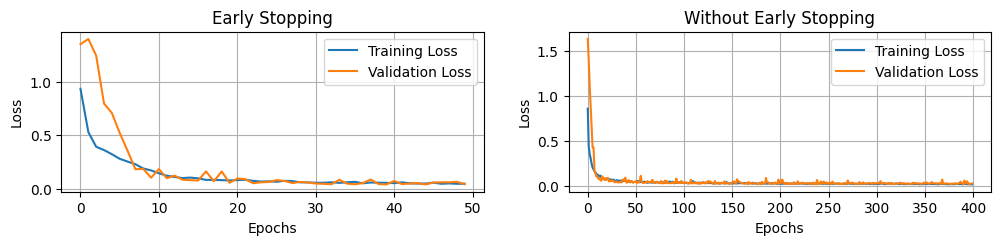

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot for weight_model_history_early_stopping
axs[0].plot(weight_model_history_early_stopping.history['loss'], label='Training Loss')
axs[0].plot(weight_model_history_early_stopping.history['val_loss'], label='Validation Loss')
axs[0].set_title('Early Stopping')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[0].legend()

# Plot for weight_model_history
axs[1].plot(weight_model_history.history['loss'], label='Training Loss')
axs[1].plot(weight_model_history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Without Early Stopping')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].legend()

plt.subplots_adjust(top=0.4, bottom=0.0)
plt.show()

# Conclusion

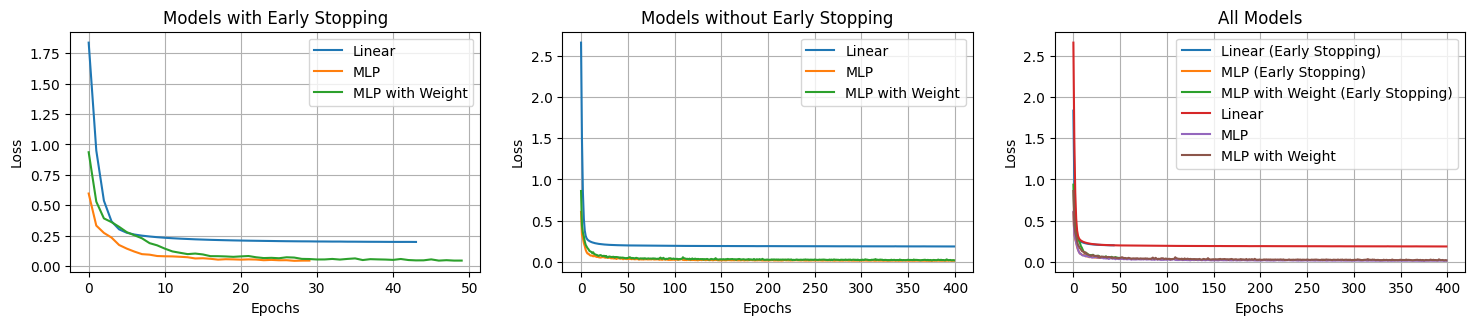

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for models with early stopping
axs[0].plot(linear_history_early_stopping.history['loss'], label='Linear')
axs[0].plot(mlp_history_early_stopping.history['loss'], label='MLP')
axs[0].plot(weight_model_history_early_stopping.history['loss'], label='MLP with Weight')
axs[0].set_title('Models with Early Stopping')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[0].legend()

# Plot for models without early stopping
axs[1].plot(linear_history.history['loss'], label='Linear')
axs[1].plot(mlp_history.history['loss'], label='MLP')
axs[1].plot(weight_model_history.history['loss'], label='MLP with Weight')
axs[1].set_title('Models without Early Stopping')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].legend()

# Plot for all models
axs[2].plot(linear_history_early_stopping.history['loss'], label='Linear (Early Stopping)')
axs[2].plot(mlp_history_early_stopping.history['loss'], label='MLP (Early Stopping)')
axs[2].plot(weight_model_history_early_stopping.history['loss'], label='MLP with Weight (Early Stopping)')
axs[2].plot(linear_history.history['loss'], label='Linear')
axs[2].plot(mlp_history.history['loss'], label='MLP')
axs[2].plot(weight_model_history.history['loss'], label='MLP with Weight')
axs[2].set_title('All Models')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Loss')
axs[2].grid(True)
axs[2].legend()

plt.subplots_adjust(top=0.4, bottom=0.0)
plt.show()

## Convolutional Neural Network (CNN) Modeling with and without Early Stopping

This section outlines the implementation of Convolutional Neural Network (CNN) models with early stopping for regression tasks. The process involves the following steps:

1. **CNN Model Definition:** Two CNN models are defined using the Keras Sequential API. Each model consists of convolutional layers with ReLU activation functions, max-pooling layers for downsampling, and dense layers for regression.

2. **Model Compilation:** Both CNN models are compiled using the Adam optimizer, mean squared error (MSE) as the loss function, and mean absolute error (MAE) as the metric.

3. **Model Training:** The CNN models are trained on the preprocessed training data with early stopping applied to one of the models. The `fit` method is used to train the models with specified epochs, batch size, and verbose mode.

4. **Evaluation:** After training, the performance of both models is evaluated on the validation set using MSE and MAE metrics.

In [16]:
cnn_model_early_stopping = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=X_train_preprocessed.shape[1]),
    MaxPooling1D(2),

    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),

    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(1)
])

cnn_model_early_stopping.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mae'])

cnn_model_history_early_stopping = cnn_model_early_stopping.fit(X_train_preprocessed, y_train,
                    validation_data=(X_valid_preprocessed, y_valid),
                    epochs=400,
                    batch_size=32,
                    verbose=2,
                    callbacks=[early_stopping])

cnn_model_evalutaion_result_early_stopping = cnn_model_early_stopping.evaluate(X_valid_preprocessed, y_valid, verbose=0)

Epoch 1/400
71/71 - 1s - loss: 0.4294 - mae: 0.4886 - val_loss: 0.3135 - val_mae: 0.3981 - 761ms/epoch - 11ms/step
Epoch 2/400
71/71 - 0s - loss: 0.2606 - mae: 0.3856 - val_loss: 0.2664 - val_mae: 0.3900 - 477ms/epoch - 7ms/step
Epoch 3/400
71/71 - 1s - loss: 0.2463 - mae: 0.3746 - val_loss: 0.2529 - val_mae: 0.3737 - 536ms/epoch - 8ms/step
Epoch 4/400
71/71 - 0s - loss: 0.2283 - mae: 0.3608 - val_loss: 0.2490 - val_mae: 0.3644 - 466ms/epoch - 7ms/step
Epoch 5/400
71/71 - 1s - loss: 0.2171 - mae: 0.3508 - val_loss: 0.2366 - val_mae: 0.3528 - 554ms/epoch - 8ms/step
Epoch 6/400
71/71 - 0s - loss: 0.2211 - mae: 0.3528 - val_loss: 0.2400 - val_mae: 0.3721 - 469ms/epoch - 7ms/step
Epoch 7/400
71/71 - 0s - loss: 0.1977 - mae: 0.3360 - val_loss: 0.2156 - val_mae: 0.3427 - 467ms/epoch - 7ms/step
Epoch 8/400
71/71 - 0s - loss: 0.1790 - mae: 0.3198 - val_loss: 0.1904 - val_mae: 0.3252 - 466ms/epoch - 7ms/step
Epoch 9/400
71/71 - 0s - loss: 0.1542 - mae: 0.2966 - val_loss: 0.1587 - val_mae: 0.276

In [17]:
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=X_train_preprocessed.shape[1]),
    MaxPooling1D(2),

    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),

    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(1)
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mae'])

cnn_model.summary()

cnn_model_history = cnn_model.fit(X_train_preprocessed, y_train,
                    validation_data=(X_valid_preprocessed, y_valid),
                    epochs=400,
                    batch_size=32,
                    verbose=2)

cnn_model_evalutaion_result = cnn_model.evaluate(X_valid_preprocessed, y_valid, verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 240, 32)           128       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 120, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 118, 64)           6208      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 59, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 57, 128)           24704     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 28, 128)          

## Results

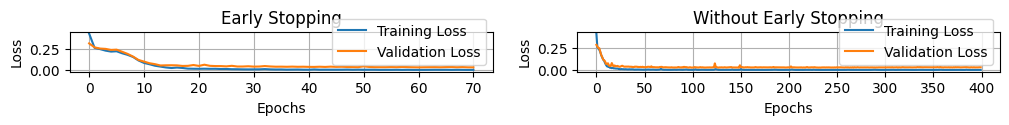

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(cnn_model_history_early_stopping.history['loss'], label='Training Loss')
axs[0].plot(cnn_model_history_early_stopping.history['val_loss'], label='Validation Loss')
axs[0].set_title('Early Stopping')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(cnn_model_history.history['loss'], label='Training Loss')
axs[1].plot(cnn_model_history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Without Early Stopping')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].legend()

plt.subplots_adjust(top=0.1, bottom=0.0)
plt.show()

# Comparing All Models
## Training Loss Early Stopping

In [19]:
print(f"Linear Regression model loss is : {linear_history_early_stopping.history['loss'][-1]}\nMLP model loss is: {mlp_history_early_stopping.history['loss'][-1]}\nMLP model with updated weights loss is : {weight_model_history_early_stopping.history['loss'][-1]}\nCNN model loss is: {cnn_model_history_early_stopping.history['loss'][-1]}\n")

Linear Regression model loss is : 0.1988978534936905
MLP model loss is: 0.045648038387298584
MLP model with updated weights loss is : 0.04577172175049782
CNN model loss is: 0.0024852794595062733



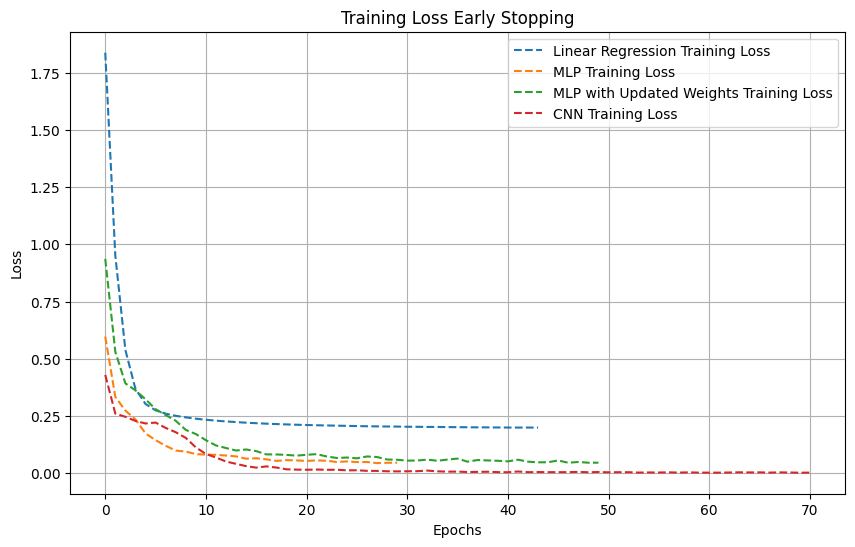

In [20]:
history_objects_early_stopping = [linear_history_early_stopping, mlp_history_early_stopping, 
                   weight_model_history_early_stopping, cnn_model_history_early_stopping]

model_names = ['Linear Regression', 'MLP', 'MLP with Updated Weights', 'CNN']

plt.figure(figsize=(10, 6))
for history, name in zip(history_objects_early_stopping, model_names):
    plt.plot(history.history['loss'], label=f'{name} Training Loss', linestyle='--')

plt.title('Training Loss Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Validation Loss Early Stopping

In [21]:
print(f"Linear Regression model validation loss is : {linear_history_early_stopping.history['val_loss'][-1]}\nMLP model validation loss is: {mlp_history_early_stopping.history['val_loss'][-1]}\nMLP model with updated weights validation loss is : {weight_model_history_early_stopping.history['val_loss'][-1]}\nCNN model validation loss is: {cnn_model_history_early_stopping.history['val_loss'][-1]}")

Linear Regression model validation loss is : 0.24095188081264496
MLP model validation loss is: 0.052904028445482254
MLP model with updated weights validation loss is : 0.041794780641794205
CNN model validation loss is: 0.032487042248249054


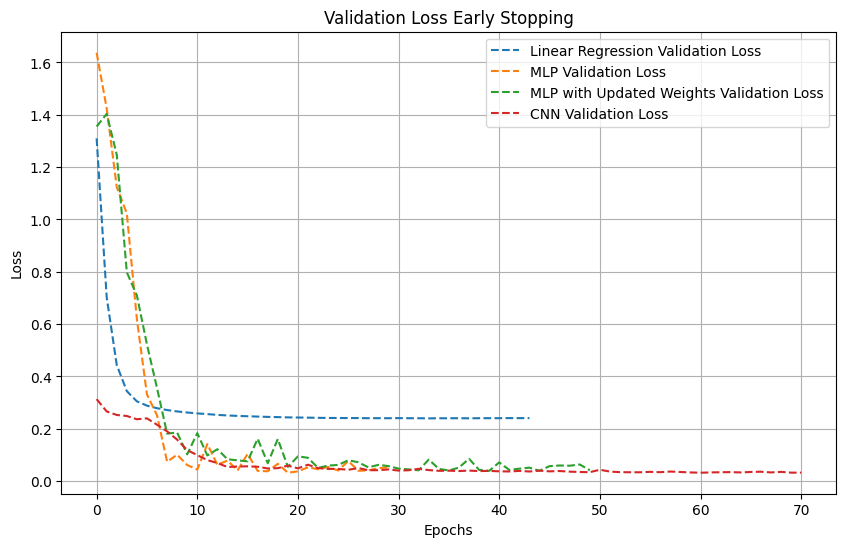

In [22]:
plt.figure(figsize=(10, 6))
for history, name in zip(history_objects_early_stopping, model_names):
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss', linestyle='--')

plt.title('Validation Loss Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Training Loss Without Early Stopping

In [23]:
print(f"Linear Regression model loss is : {linear_history.history['loss'][-1]}\nMLP model loss is: {mlp_history.history['loss'][-1]}\nMLP model with updated weights loss is : {weight_model_history.history['loss'][-1]}\nCNN model loss is: {cnn_model_history.history['loss'][-1]}\n")

Linear Regression model loss is : 0.18462540209293365
MLP model loss is: 0.011444801464676857
MLP model with updated weights loss is : 0.01643555238842964
CNN model loss is: 0.0003936566354241222



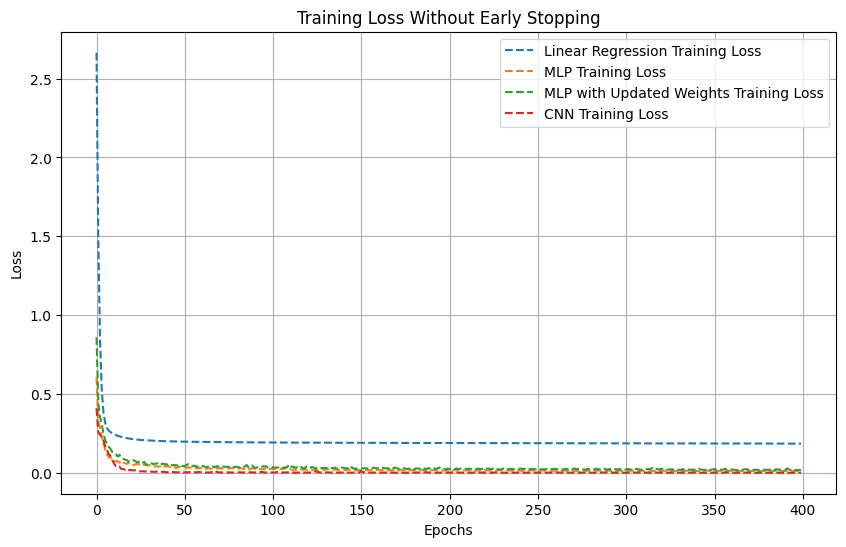

In [24]:
history_objects = [linear_history, mlp_history, 
                   weight_model_history, cnn_model_history]

plt.figure(figsize=(10, 6))
for history, name in zip(history_objects, model_names):
    plt.plot(history.history['loss'], label=f'{name} Training Loss', linestyle='--')

plt.title('Training Loss Without Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Validation Loss Without Early Stopping

In [25]:
print(f"Linear Regression model validation loss is : {linear_history.history['val_loss'][-1]}\nMLP model validation loss is: {mlp_history.history['val_loss'][-1]}\nMLP model with updated weights validation loss is : {weight_model_history.history['val_loss'][-1]}\nCNN model validation loss is: {cnn_model_history.history['val_loss'][-1]}")

Linear Regression model validation loss is : 0.25942352414131165
MLP model validation loss is: 0.02897074446082115
MLP model with updated weights validation loss is : 0.026897361502051353
CNN model validation loss is: 0.029657892882823944


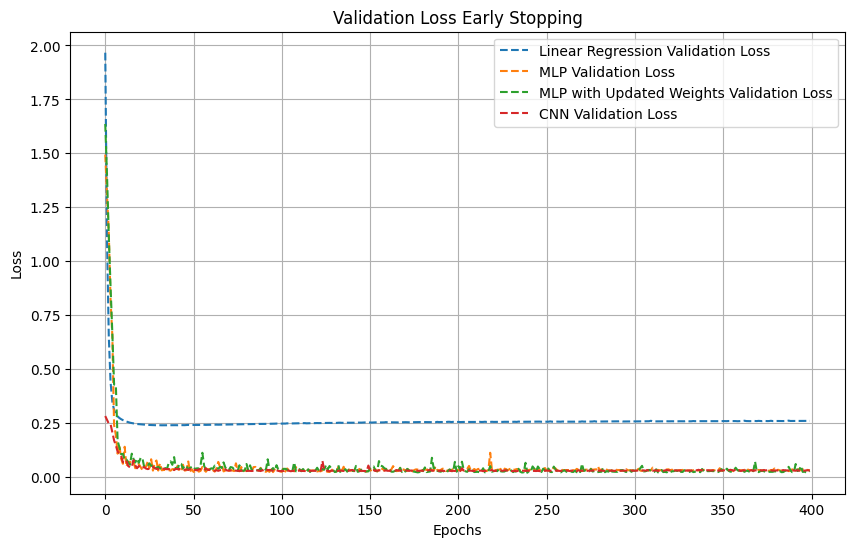

In [26]:
plt.figure(figsize=(10, 6))
for history, name in zip(history_objects, model_names):
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss', linestyle='--')

plt.title('Validation Loss Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()